In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
sns.set(
    font='Malgun Gothic',
    rc ={'axes.unicode_minus' : False},
    style='darkgrid'
    )

In [4]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

C:\Users\pc\AppData\Local\Temp\ipykernel_13576\3099769027.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [5]:
df = pd.read_csv("./data/crisis_address(utf-8).csv", encoding='utf-8')
df.head()

,DST_RSK_DSTRCT_NM,DST_RSK_DSTRCT_GRD_CD,DST_RSK_DSTRCT_TYPE_CD,DST_RSK_DSTRCTCD,DST_RSK_DSTRCT_RGN_CD,FCLT_NM,DSGN_YMD,DSGN_RSN,RSK_FACTR_CN,DSGN_AREA,STDG_CD,DADDR,RONA_DADDR,x,y
0,청룡지구,2,1,NaN,4885041000,청룡지구,20100520,상습침수지역,상습침수지역,450000.0,4.885041e+09,NaN,[지점번호:라라35898709],NaN,NaN
1,아랫들지구,3,1,NaN,4721000000,아랫들지구,20060228,재해위험지구 지정관리,제방붕괴 우려\r\n- 죽계지구 하천재해예방사업(준공예정일 : '23. 12. 17.),140000.0,4.721037e+09,NaN,NaN,NaN,NaN
2,중촌들지구,3,2,NaN,4721000000,중촌들지구,20060228,재해위험지구 지정관리,세굴로 인한 제방붕괴 우려\r\n- 죽계2지구 하천재해예방사업(준공예정일 : '23...,100000.0,4.721037e+09,NaN,NaN,NaN,NaN
3,피골지구,1,1,NaN,4721000000,피골지구,20060228,재해위험지구 지정관리,침수위험\r\n- 죽계지구 하천재해예방사업(준공일 : '19. 12. 16.),60000.0,4.721011e+09,NaN,NaN,NaN,NaN
4,죽계지구,3,1,NaN,4721000000,죽계지구,20060302,재해위험지구 지정관리,침수위험\r\n- 죽계지구 하천재해예방사업(준공예정일 : '23. 12. 17.),720000.0,4.721037e+09,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['DST_RSK_DSTRCT_NM', 'DST_RSK_DSTRCT_GRD_CD', 'DST_RSK_DSTRCT_TYPE_CD',
       'DST_RSK_DSTRCTCD', 'DST_RSK_DSTRCT_RGN_CD', 'FCLT_NM', 'DSGN_YMD',
       'DSGN_RSN', 'RSK_FACTR_CN', 'DSGN_AREA', 'STDG_CD', 'DADDR',
       'RONA_DADDR', 'x', 'y'],
      dtype='object')

In [18]:
df['DST_RSK_DSTRCT_TYPE_CD'].value_counts()

DST_RSK_DSTRCT_TYPE_CD
1    114
2     34
3      9
5      5
4      4
6      1
Name: count, dtype: int64

## barplot

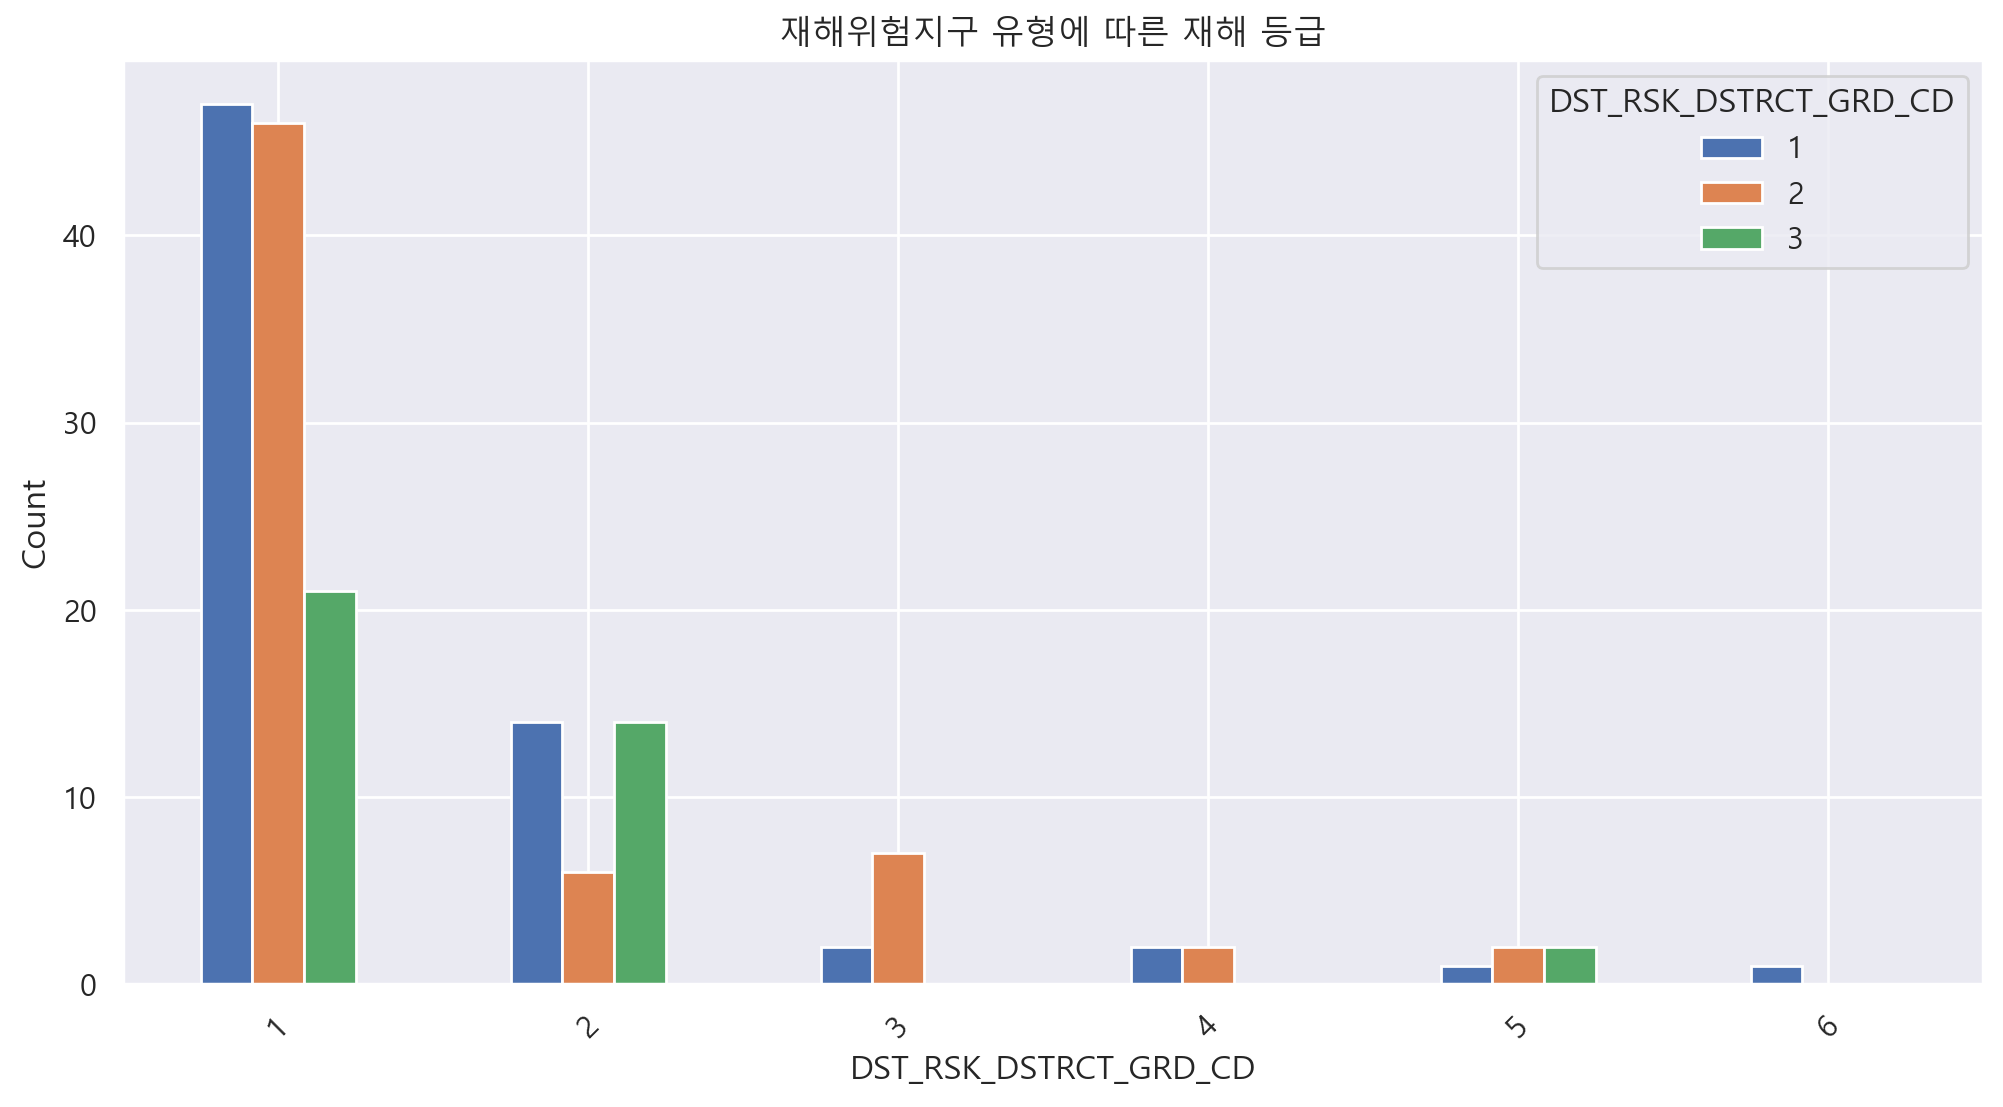

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'DST_RSK_DSTRCT_TYPE_CD' and count the 'DST_RSK_DSTRCT_GRD_CD' values
grouped = df.groupby(['DST_RSK_DSTRCT_TYPE_CD', 'DST_RSK_DSTRCT_GRD_CD']).size().reset_index(name='count')

# Pivot the data to create a wide-format DataFrame
pivot_table = grouped.pivot(index='DST_RSK_DSTRCT_TYPE_CD', columns='DST_RSK_DSTRCT_GRD_CD', values='count')

# Create the bar plot
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title('재해위험지구 유형에 따른 재해 등급')
plt.xlabel('DST_RSK_DSTRCT_GRD_CD')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## 지도시각화

In [8]:
import folium

In [22]:
import folium
import pandas as pd

# Create the map
m = folium.Map(location=[df['y'].mean(), df['x'].mean()], zoom_start=7)

# Add markers with popups, skipping rows with NaN values
for i, row in df.iterrows():
    if pd.notnull(row['y']) and pd.notnull(row['x']):
        popup = folium.Popup(df.loc[i, 'DST_RSK_DSTRCT_NM'], max_width=300)
        folium.Marker([row['y'], row['x']], popup=popup).add_to(m)

# Save the map to an HTML file
m.save('./data/map_with_popups.html')


In [23]:
m

In [77]:
import folium
import pandas as pd

# 데이터프레임의 평균 좌표를 중심으로 지도를 생성합니다.
m = folium.Map(location=[df['y'].mean(), df['x'].mean()], zoom_start=8)

# 데이터프레임의 각 행을 반복합니다.
for i, row in df.iterrows():
    # y, x, DSGN_AREA 열에 NaN 값이 없는 경우에만 실행합니다.
    if pd.notnull(row['y']) and pd.notnull(row['x']) and pd.notnull(row['DSGN_AREA']):
        # 위험 지역의 이름을 팝업으로 설정합니다.
        popup = folium.Popup(row['DST_RSK_DSTRCT_NM'], max_width=300)
        
        # 원의 반지름을 계산합니다 (면적의 제곱근을 사용).
        radius = (row['DSGN_AREA'] ** 0.5)  # 면적을 제곱미터로 직접 사용하여 제곱근을 구합니다.
        
        # 지도에 원을 추가합니다.
        folium.Circle(
            location=[row['y'], row['x']],  # 원의 중심 좌표 (위도, 경도)
            radius=radius,  # 원의 반지름
            color='blue',  # 원의 테두리 색상
            fill=True,  # 원을 채울지 여부
            fill_color='red',  # 원의 채움 색상
            fill_opacity=0.5,  # 원의 채움 불투명도
            popup=popup  # 원 클릭 시 표시되는 팝업
        ).add_to(m)

# 지도를 'map_with_circles.html' 파일로 저장합니다.
m.save('./data/map_with_scaled_circles.html')


In [78]:
m

In [ ]:
import folium
import pandas as pd

m = folium.Map(location=[df['y'].mean(), df['x'].mean()], zoom_start=8)

for i, row in df.iterrows():
    if pd.notnull(row['y']) and pd.notnull(row['x']) and pd.notnull(row['DSGN_AREA']):
        popup = folium.Popup(row['DST_RSK_DSTRCT_NM'], max_width=300)
        radius = (row['DSGN_AREA'] ** 0.5)
        folium.Circle(
            location=[row['y'], row['x']],
            radius=radius,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.5,
            popup=popup
        ).add_to(m)

m.save('./data/map_with_scaled_circles.html')


In [106]:
import folium
import pandas as pd

# Define a dictionary to map 'DST_RSK_DSTRCT_TYPE_CD' values to colors
color_map = {
    1: 'blue',
    2: 'purple',
    3: 'gray',
    4: 'orange',
    5: 'green',
    6: 'darkblue'
}

m = folium.Map(location=[df['y'].mean(), df['x'].mean()], zoom_start=8)

for i, row in df.iterrows():
    if pd.notnull(row['y']) and pd.notnull(row['x']) and pd.notnull(row['DSGN_AREA']):
        popup = folium.Popup(row['DST_RSK_DSTRCT_NM'], max_width=300)
        radius = (row['DSGN_AREA'] ** 0.5)
        color = color_map.get(row['DST_RSK_DSTRCT_TYPE_CD'], 'red')  # Default to 'red' if type code is not in color_map
        folium.Circle(
            location=[row['y'], row['x']],
            radius=radius,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.5,
            popup=popup
        ).add_to(m)

m.save('./data/map_with_scaled_circles.html')


In [107]:
m

In [110]:
import folium
import pandas as pd
import requests

# Define a dictionary to map 'DST_RSK_DSTRCT_TYPE_CD' values to colors
color_map = {
    1: 'blue',
    2: 'purple',
    3: 'gray',
    4: 'orange',
    5: 'green',
    6: 'darkblue'
}

m = folium.Map(location=[df['y'].mean(), df['x'].mean()], zoom_start=8)

for i, row in df.iterrows():
    if pd.notnull(row['y']) and pd.notnull(row['x']) and pd.notnull(row['DSGN_AREA']):
        # Create the popup content with additional data
        popup_content = f"""
        <b>재해위험지구관리번호:</b> {row['DST_RSK_DSTRCT_NM']}<br>
        <b>재해위험지구등급코드:</b> {row['DST_RSK_DSTRCT_GRD_CD']}<br>
        <b>재해위험지구유형코드:</b> {row['DST_RSK_DSTRCT_TYPE_CD']}<br>
        <b>재해위험지구코드:</b> {row['DST_RSK_DSTRCTCD']}<br>
        <b>재해위험지구지역코드:</b> {row['DST_RSK_DSTRCT_RGN_CD']}<br>
        <b>시설명:</b> {row['FCLT_NM']}<br>
        <b>지정일자:</b> {row['DSGN_YMD']}<br>
        <b>지정사유:</b> {row['DSGN_RSN']}
        """
        popup = folium.Popup(popup_content, max_width=300)
        
        radius = (row['DSGN_AREA'] ** 0.5)
        color = color_map.get(row['DST_RSK_DSTRCT_TYPE_CD'], 'red')  # Default to 'red' if type code is not in color_map
        
        folium.Circle(
            location=[row['y'], row['x']],
            radius=radius,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.5,
            popup=popup
        ).add_to(m)



In [111]:
m

In [112]:


# Your REST API key for Kakao API
rest_api_key = 'bf0070cbed9ecd623aeead721c91397b'

# Function to get latitude and longitude from an address
def lat_long(address):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
    headers = {"Authorization": "KakaoAK " + rest_api_key}
    try:
        response = requests.get(url, headers=headers)
        json_result = response.json()
        address_xy = json_result['documents'][0]['address']
        return float(address_xy['x']), float(address_xy['y'])
    except Exception as e:
        print(e)
        return None, None

# Function to mark an address on the map
def mark_address_on_map(address, folium_map):
    x, y = lat_long(address)
    if x is None or y is None:
        print("Failed to get coordinates for the address.")
        return

    folium.Marker([y, x], popup=address).add_to(folium_map)
    print("Address marker has been added to the map.")

# Example address to locate
address = '서울특별시 종로구 세종대로 209'
mark_address_on_map(address, m)

# Save the map with circles and the address marker
m.save('./data/map_with_scaled_circles.html')

Address marker has been added to the map.


In [113]:
m